Link to file: https://github.com/johannesfuest/Applied_Optimization

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import cvxpy as cp

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data  # Features
y = iris.target  # Labels
mask = y < 2
X = X[mask]
y = y[mask]
# Add a bias term to the features
X = np.c_[X, np.ones(X.shape[0])]


# Convert labels to +1 (Versicolor) and -1 (Setosa)
y_signed = np.where(y == 1, 1, -1)


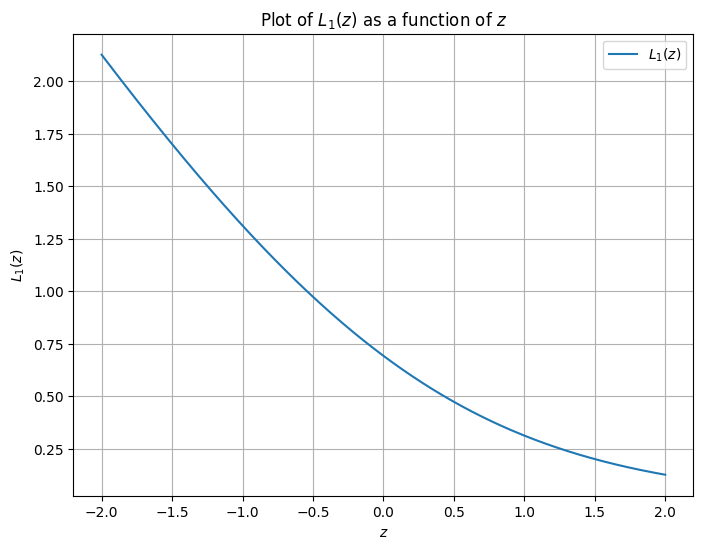

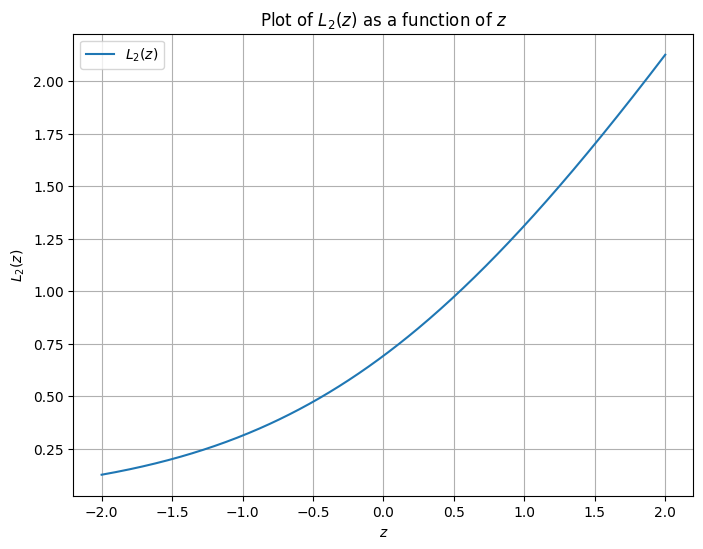

In [11]:
# Plot L1(z)
z = np.linspace(-2, 2, 400)
L1 = -np.log(1 / (1 + np.exp(-z)))

plt.figure(figsize=(8, 6))
plt.plot(z, L1, label='$L_1(z)$')
plt.title('Plot of $L_1(z)$ as a function of $z$')
plt.xlabel('$z$')
plt.ylabel('$L_1(z)$')
plt.legend()
plt.grid(True)
plt.show()

L2 = -np.log(np.exp(-z) / (1 + np.exp(-z)))

plt.figure(figsize=(8, 6))
plt.plot(z, L2, label='$L_2(z)$')
plt.title('Plot of $L_2(z)$ as a function of $z$')
plt.xlabel('$z$')
plt.ylabel('$L_2(z)$')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
beta = cp.Variable(X.shape[1])
z = -cp.multiply(y_signed, X @ beta)  # Compute -y_i * (X_i @ beta)

# Use cp.log_sum_exp to define logistic loss
logistic_loss = cp.sum(cp.log_sum_exp(cp.vstack([np.zeros(z.shape[0]), z]), axis=0))

# Form and solve the problem.
problem = cp.Problem(cp.Minimize(logistic_loss))
problem.solve()

# Print the results.
print("\nThe optimal value is", problem.value)
print("The optimal beta is")
print(beta.value)
print(f"The accuracy of the model is {np.mean(np.sign(X @ beta.value) == y_signed) * 100:.2f}%")




The optimal value is 5.270633703706942e-09
The optimal beta is
[-6.12841315 -9.00544926 14.82037601 25.9310725   1.09049274]
The accuracy of the model is 100.00%


/Users/johannesfuest/Library/Mobile Documents/com~apple~CloudDocs/Documents/Stanford/PhD/MS&E 214/Applied_Optimization/mse_214/lib/python3.12/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [21]:
ridge_lambdas = [0.01, 0.1, 1, 10, 100]

for ridge_lambda in ridge_lambdas:
    beta = cp.Variable(X.shape[1])
    z = -cp.multiply(y_signed, X @ beta)  # Compute -y_i * (X_i @ beta)

    # Use cp.log_sum_exp to define logistic loss
    logistic_loss = cp.sum(cp.log_sum_exp(cp.vstack([np.zeros(z.shape[0]), z]), axis=0))

    # Add L2 regularization term to the logistic loss
    logistic_loss += ridge_lambda * cp.norm(beta, 2)

    # Form and solve the problem.
    problem = cp.Problem(cp.Minimize(logistic_loss))
    problem.solve()

    # Print the results.
    print("\nThe optimal value is", problem.value)
    print("The optimal beta is")
    print(beta.value)
    print(f"The accuracy of the model is {np.mean(np.sign(X @ beta.value) == y_signed) * 100:.2f}%")


The optimal value is 0.09464364808149181
The optimal beta is
[-1.29032097 -3.91173946  6.36610157  3.36882911 -0.7235964 ]
The accuracy of the model is 100.00%

The optimal value is 0.6965564235498665
The optimal beta is
[-0.85581603 -2.92128344  4.54233704  2.25117504 -0.50664893]
The accuracy of the model is 100.00%

The optimal value is 4.724271342866454
The optimal beta is
[-0.53253193 -1.91670613  2.93170917  1.34890818 -0.33577531]
The accuracy of the model is 100.00%

The optimal value is 27.05662941975752
The optimal beta is
[-0.25309767 -0.94141841  1.44215261  0.62707698 -0.16608081]
The accuracy of the model is 100.00%

The optimal value is 69.31471807324263
The optimal beta is
[-1.28147759e-10 -2.36259347e-10  2.51186995e-10  1.12902013e-10
 -4.75417187e-11]
The accuracy of the model is 51.00%
